In [73]:
import pandas as pd

In [80]:
pcp = pd.read_csv("data/protonet_cp+_auroc_result_summary.csv")
# Extract the AUC values (ignore the +/- part)
for col in ['8', '16', '32', '64', '96']:
    pcp[col] = pcp[col].str.split(r'\+\/\-').str[0].astype(float)

pcp

,ASSAY_ID,assay_chembl_id,8,16,32,64,96
0,688267,CHEMBL1614530,0.53,0.57,0.60,0.65,0.67
1,600886,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65
2,737826,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70
3,737824_1,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70
4,737825,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60
5,1495405,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74
6,737053,CHEMBL1738598,0.50,0.50,0.53,0.54,0.58
7,737400,CHEMBL1738606,0.54,0.57,0.59,0.63,0.66
8,736947,CHEMBL1738312,0.54,0.53,0.58,0.57,0.58
9,752347,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77


In [78]:
cc = pd.read_csv("task_metrics_rule_based.csv")
cc

,Task,AUC
0,737826,0.412313
1,737824_1,0.437140
2,1495405,0.674381
3,737825,0.537802
4,752594,0.745122
5,600886,0.497028
6,752347,0.602779
7,809095,0.604911
8,845173,0.845231
9,845196,0.237130


In [79]:
# Merge with metrics_df
merged_df = cc.copy()
merged_df = merged_df.rename(columns={'Task': 'ASSAY_ID'})
merged_df = pd.merge(merged_df, pcp, on='ASSAY_ID', how='inner')
merged_df


,ASSAY_ID,AUC,assay_chembl_id,8,16,32,64,96
0,737826,0.412313,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70
1,737824_1,0.437140,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70
2,1495405,0.674381,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74
3,737825,0.537802,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60
4,752594,0.745122,CHEMBL1794584,0.76,0.78,0.81,0.80,0.82
5,600886,0.497028,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65
6,752347,0.602779,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77
7,809095,0.604911,CHEMBL1964081,0.54,0.66,0.68,0.69,0.69
8,845173,0.845231,CHEMBL2114784,0.70,0.85,0.87,0.87,0.88
9,845196,0.237130,CHEMBL2114807,0.65,0.73,0.74,0.77,0.80


In [81]:
df = merged_df

import numpy as np

# Ensure all values are at least 0.5
# df["AUC"] = np.maximum(df["AUC"], 0.5)
# df["64"] = np.maximum(df["64"], 0.5)

df

,ASSAY_ID,AUC,assay_chembl_id,8,16,32,64,96
0,737826,0.412313,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70
1,737824_1,0.437140,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70
2,1495405,0.674381,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74
3,737825,0.537802,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60
4,752594,0.745122,CHEMBL1794584,0.76,0.78,0.81,0.80,0.82
5,600886,0.497028,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65
6,752347,0.602779,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77
7,809095,0.604911,CHEMBL1964081,0.54,0.66,0.68,0.69,0.69
8,845173,0.845231,CHEMBL2114784,0.70,0.85,0.87,0.87,0.88
9,845196,0.237130,CHEMBL2114807,0.65,0.73,0.74,0.77,0.80


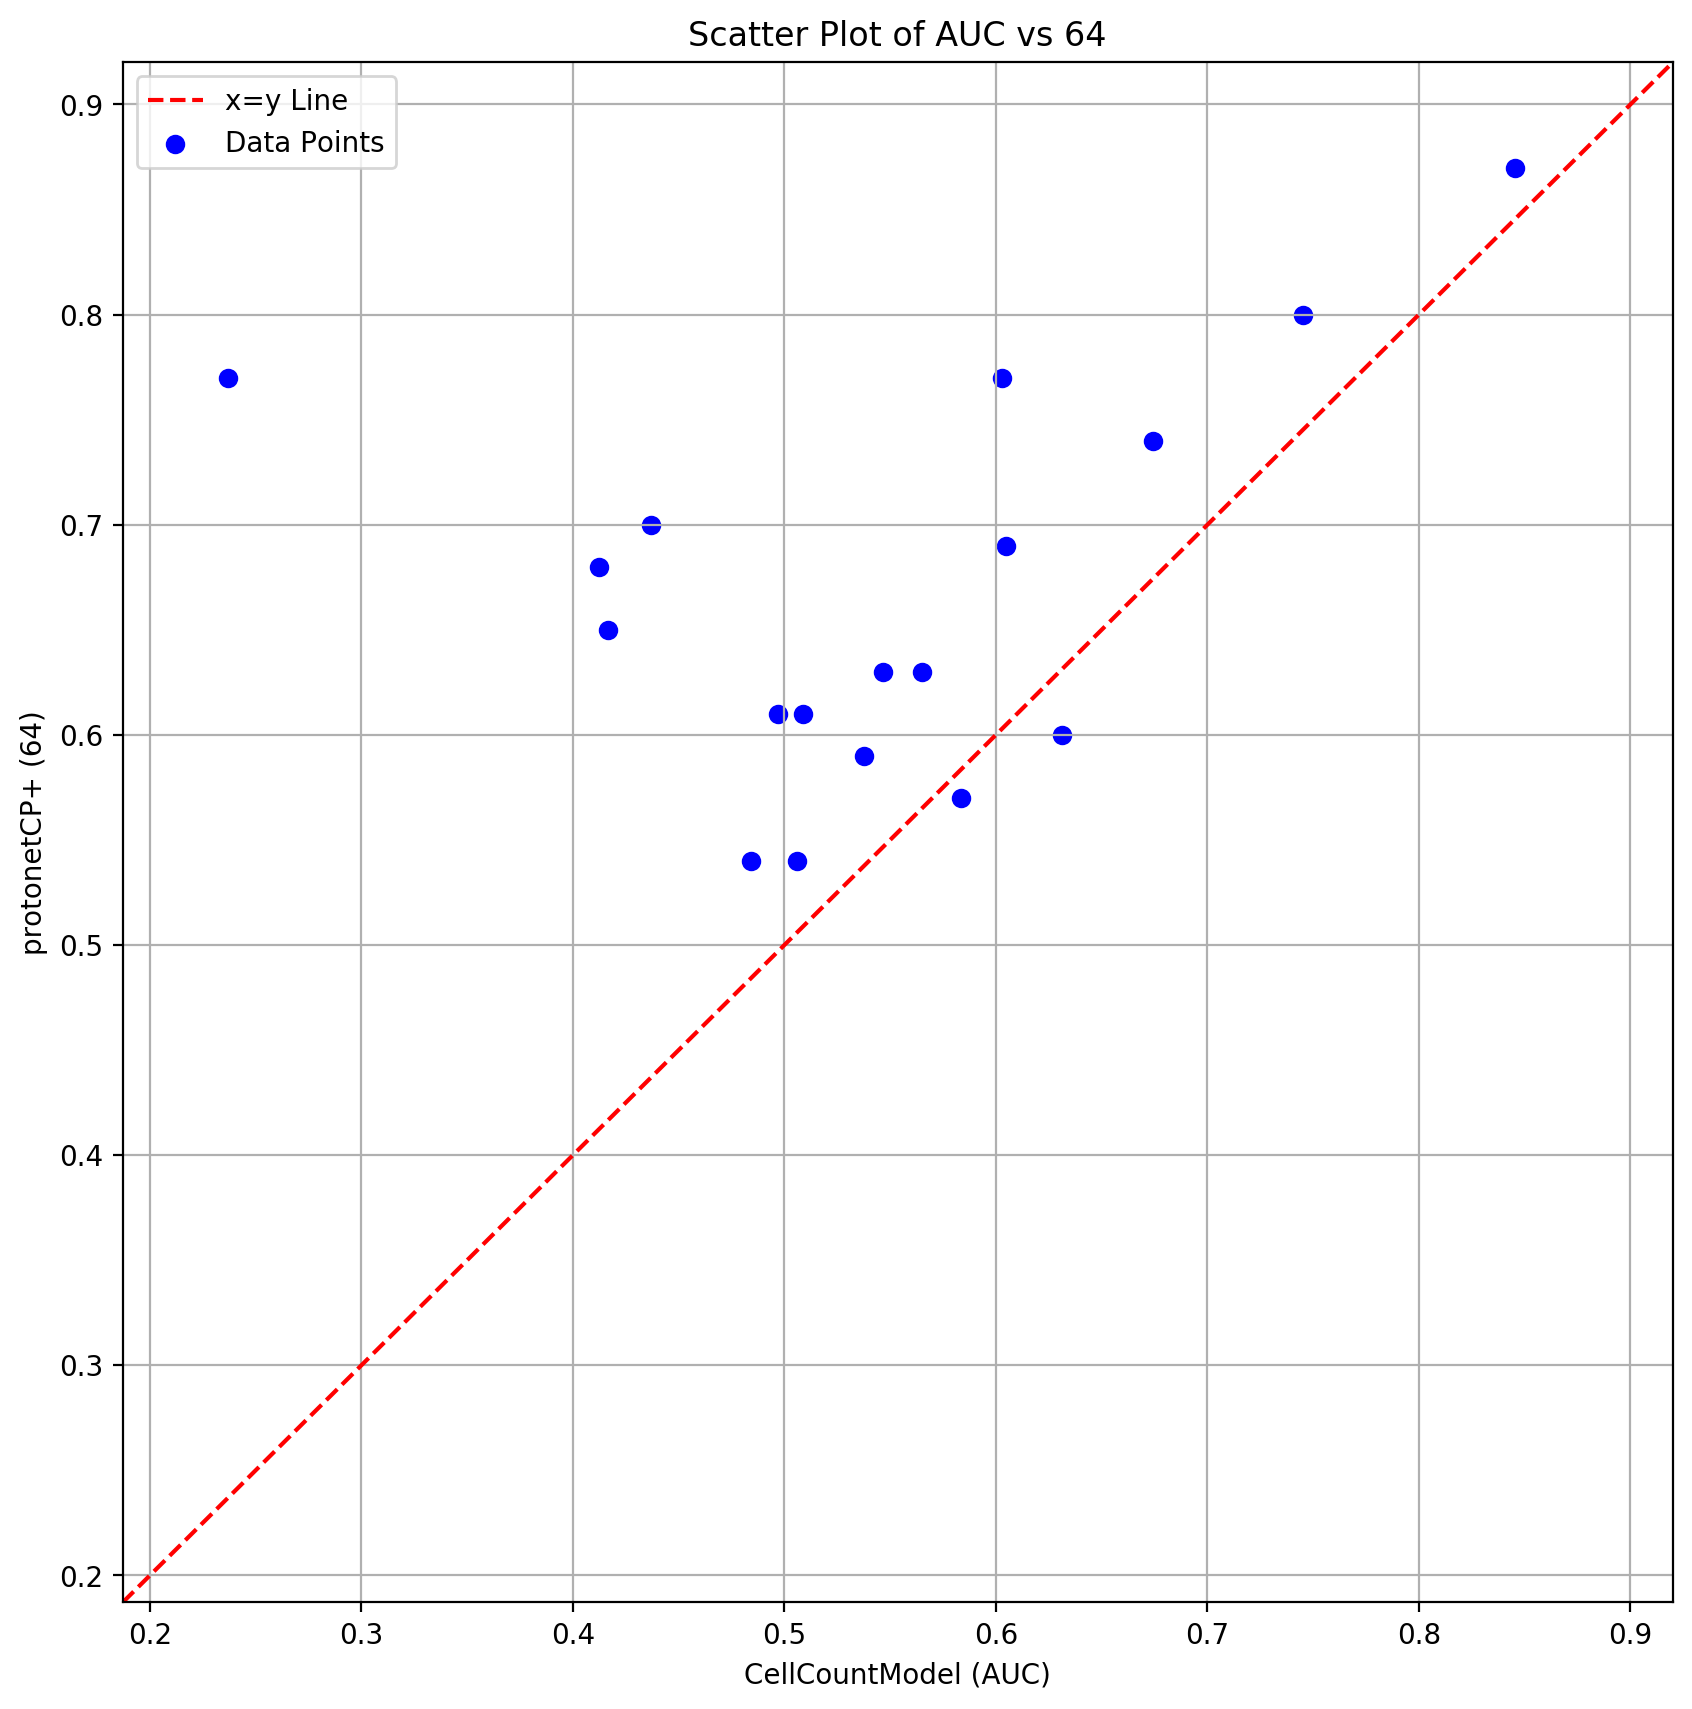

In [82]:
import matplotlib.pyplot as plt

# Create the scatter plot with higher DPI and additional enhancements
plt.figure(figsize=(10, 10), dpi=200)

# Scatter plot
plt.scatter(df["AUC"], df["64"], color='blue', label='Data Points')

# Plotting the x=y line through the center
max_val = max(df["AUC"].max()+0.05, df["64"].max()+0.05)
min_val = min(df["AUC"].min()-0.05, df["64"].min()-0.05)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='x=y Line')

# Adding titles and labels
plt.title('Scatter Plot of AUC vs 64')
plt.xlabel('CellCountModel (AUC)')
plt.ylabel('protonetCP+ (64)')
plt.legend()

# Setting the axis limits from min to max values
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Adding grid and box for better readability
plt.grid(True)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Displaying the plot
plt.show()


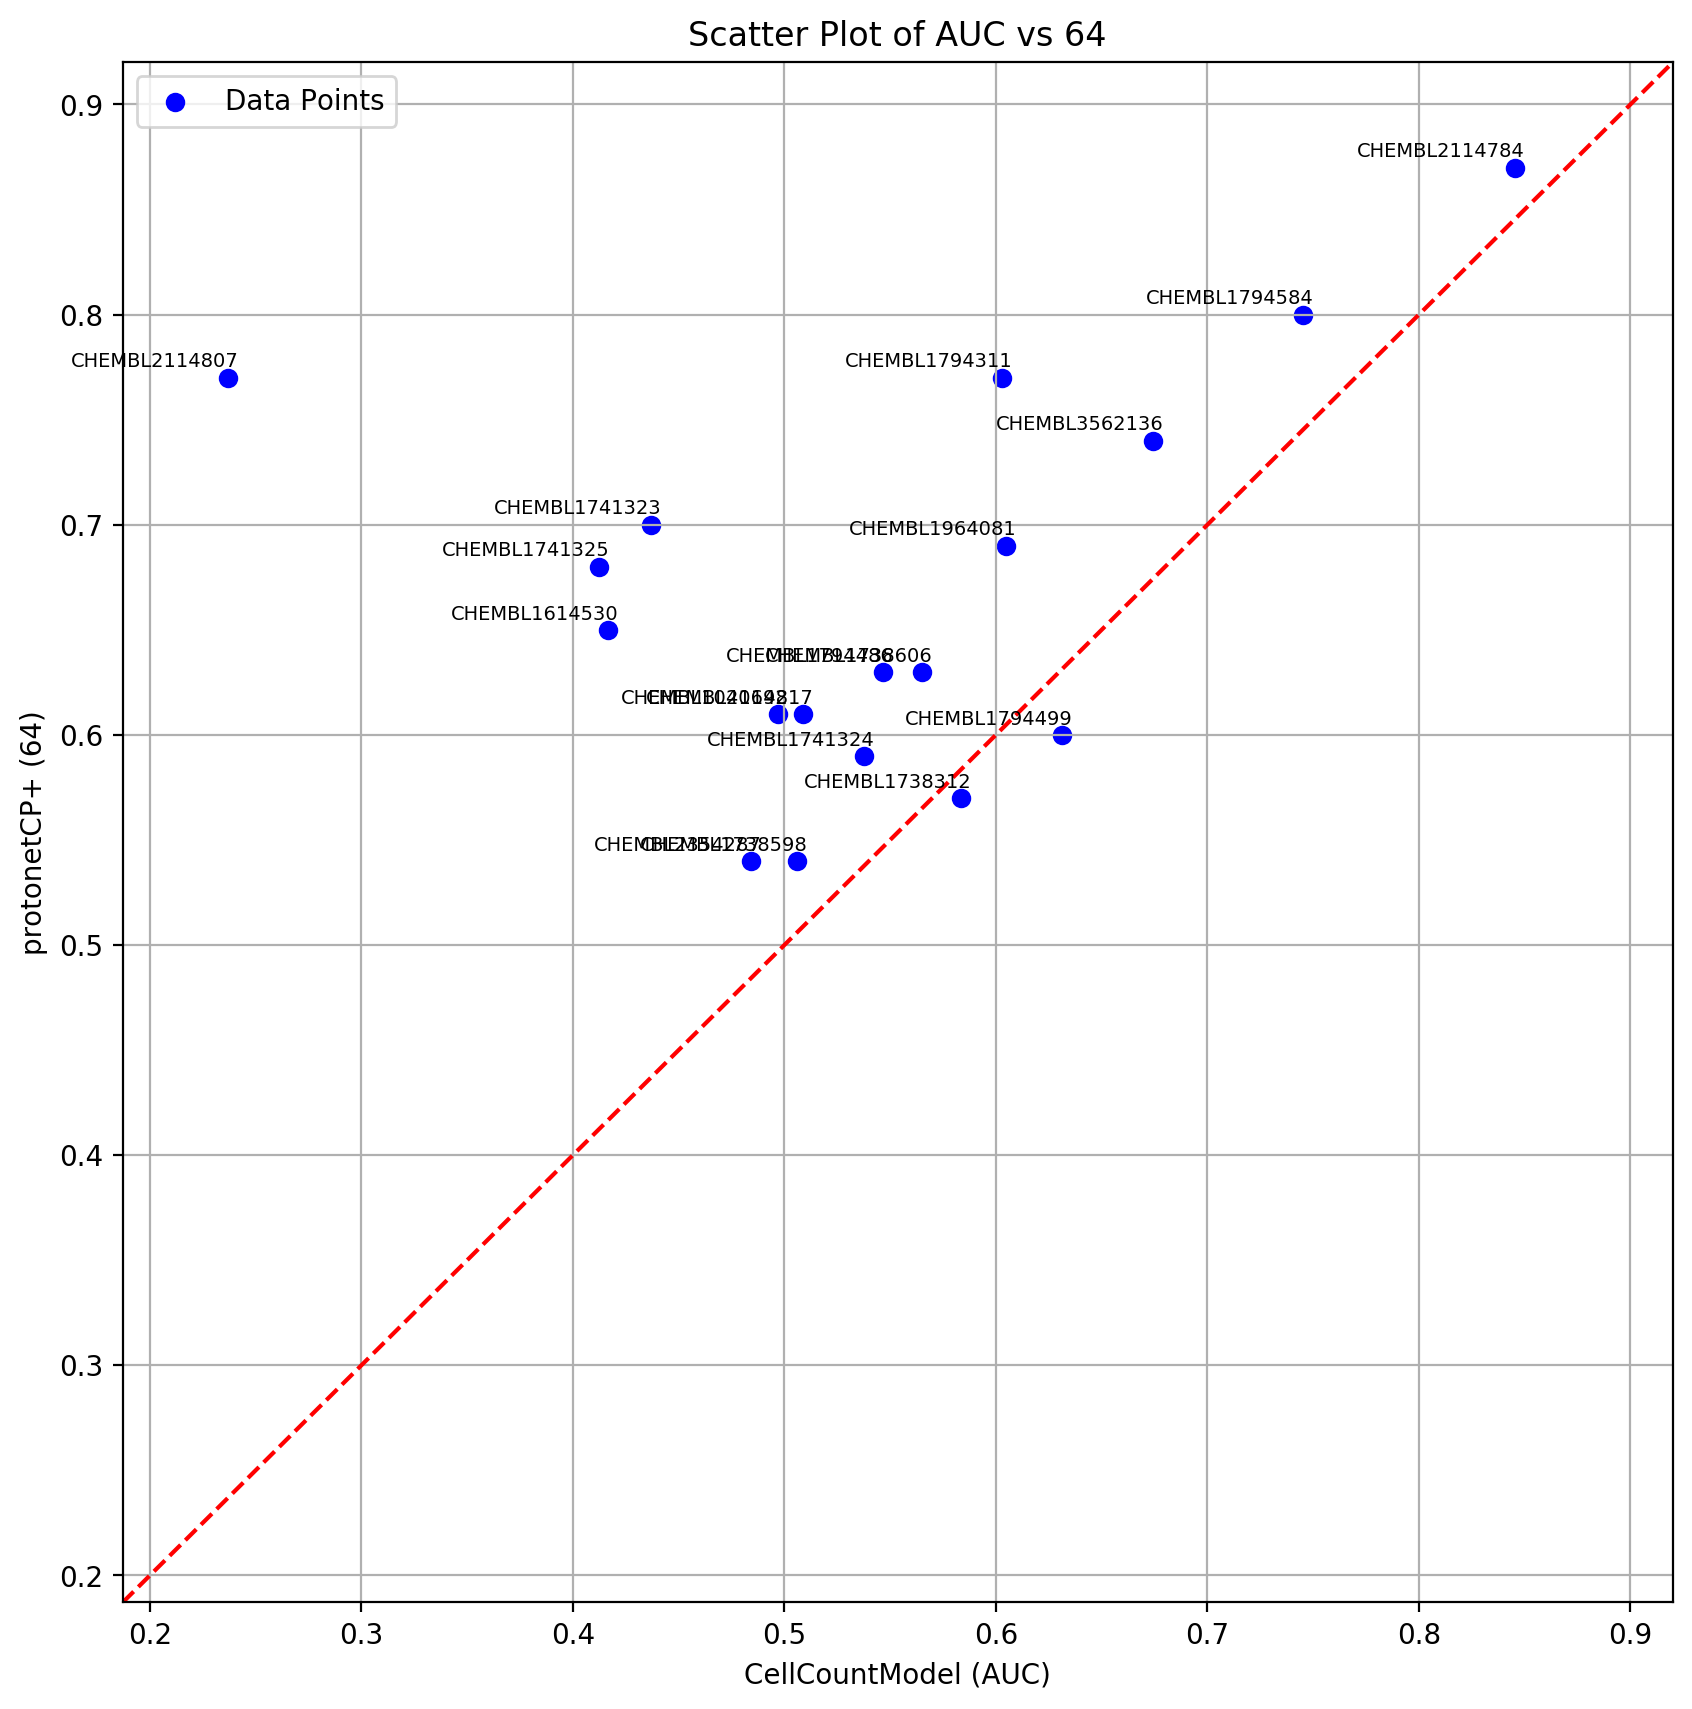

In [83]:
import matplotlib.pyplot as plt

# Extract the relevant columns
df = merged_df[["64", "AUC", "assay_chembl_id"]]

# Create the scatter plot with higher DPI and additional enhancements
plt.figure(figsize=(10, 10), dpi=200)

# Scatter plot
plt.scatter(df["AUC"], df["64"], color='blue', label='Data Points')

# Annotate each point with the assay_id
for i, row in df.iterrows():
    plt.text(row["AUC"] + 0.005, row["64"] + 0.005, row["assay_chembl_id"], fontsize=7, ha='right')

# Plotting the x=y line through the center
max_val = max(df["AUC"].max() + 0.05, df["64"].max() + 0.05)
min_val = min(df["AUC"].min() - 0.05, df["64"].min() - 0.05)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Adding titles and labels
plt.title('Scatter Plot of AUC vs 64')
plt.xlabel('CellCountModel (AUC)')
plt.ylabel('protonetCP+ (64)')
plt.legend()

# Setting the axis limits from min to max values
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Adding grid and box for better readability
plt.grid(True)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# Displaying the plot
plt.show()


In [84]:
merged_df

,ASSAY_ID,AUC,assay_chembl_id,8,16,32,64,96
0,737826,0.412313,CHEMBL1741325,0.58,0.64,0.66,0.68,0.70
1,737824_1,0.437140,CHEMBL1741323,0.60,0.64,0.67,0.70,0.70
2,1495405,0.674381,CHEMBL3562136,0.59,0.64,0.71,0.74,0.74
3,737825,0.537802,CHEMBL1741324,0.56,0.55,0.57,0.59,0.60
4,752594,0.745122,CHEMBL1794584,0.76,0.78,0.81,0.80,0.82
5,600886,0.497028,CHEMBL1040692,0.53,0.56,0.57,0.61,0.65
6,752347,0.602779,CHEMBL1794311,0.60,0.70,0.75,0.77,0.77
7,809095,0.604911,CHEMBL1964081,0.54,0.66,0.68,0.69,0.69
8,845173,0.845231,CHEMBL2114784,0.70,0.85,0.87,0.87,0.88
9,845196,0.237130,CHEMBL2114807,0.65,0.73,0.74,0.77,0.80


In [85]:
df = merged_df[["assay_chembl_id", "64", "AUC", "ASSAY_ID"]]
# Reshape the dataframe for seaborn
df_melt = df.melt(var_name='Model', value_name='Value',id_vars=["assay_chembl_id", "ASSAY_ID"])
df_melt = df_melt.replace({"64": "ProtonetCP+", "AUC": "Cell Counting Rule Based"})
df_melt

,assay_chembl_id,ASSAY_ID,Model,Value
0,CHEMBL1741325,737826,ProtonetCP+,0.680000
1,CHEMBL1741323,737824_1,ProtonetCP+,0.700000
2,CHEMBL3562136,1495405,ProtonetCP+,0.740000
3,CHEMBL1741324,737825,ProtonetCP+,0.590000
4,CHEMBL1794584,752594,ProtonetCP+,0.800000
5,CHEMBL1040692,600886,ProtonetCP+,0.610000
6,CHEMBL1794311,752347,ProtonetCP+,0.770000
7,CHEMBL1964081,809095,ProtonetCP+,0.690000
8,CHEMBL2114784,845173,ProtonetCP+,0.870000
9,CHEMBL2114807,845196,ProtonetCP+,0.770000


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ProtonetCP+ v.s. Cell Counting Rule Based: t-test paired samples with Bonferroni correction, P_val=1.495e-03 stat=3.780e+00


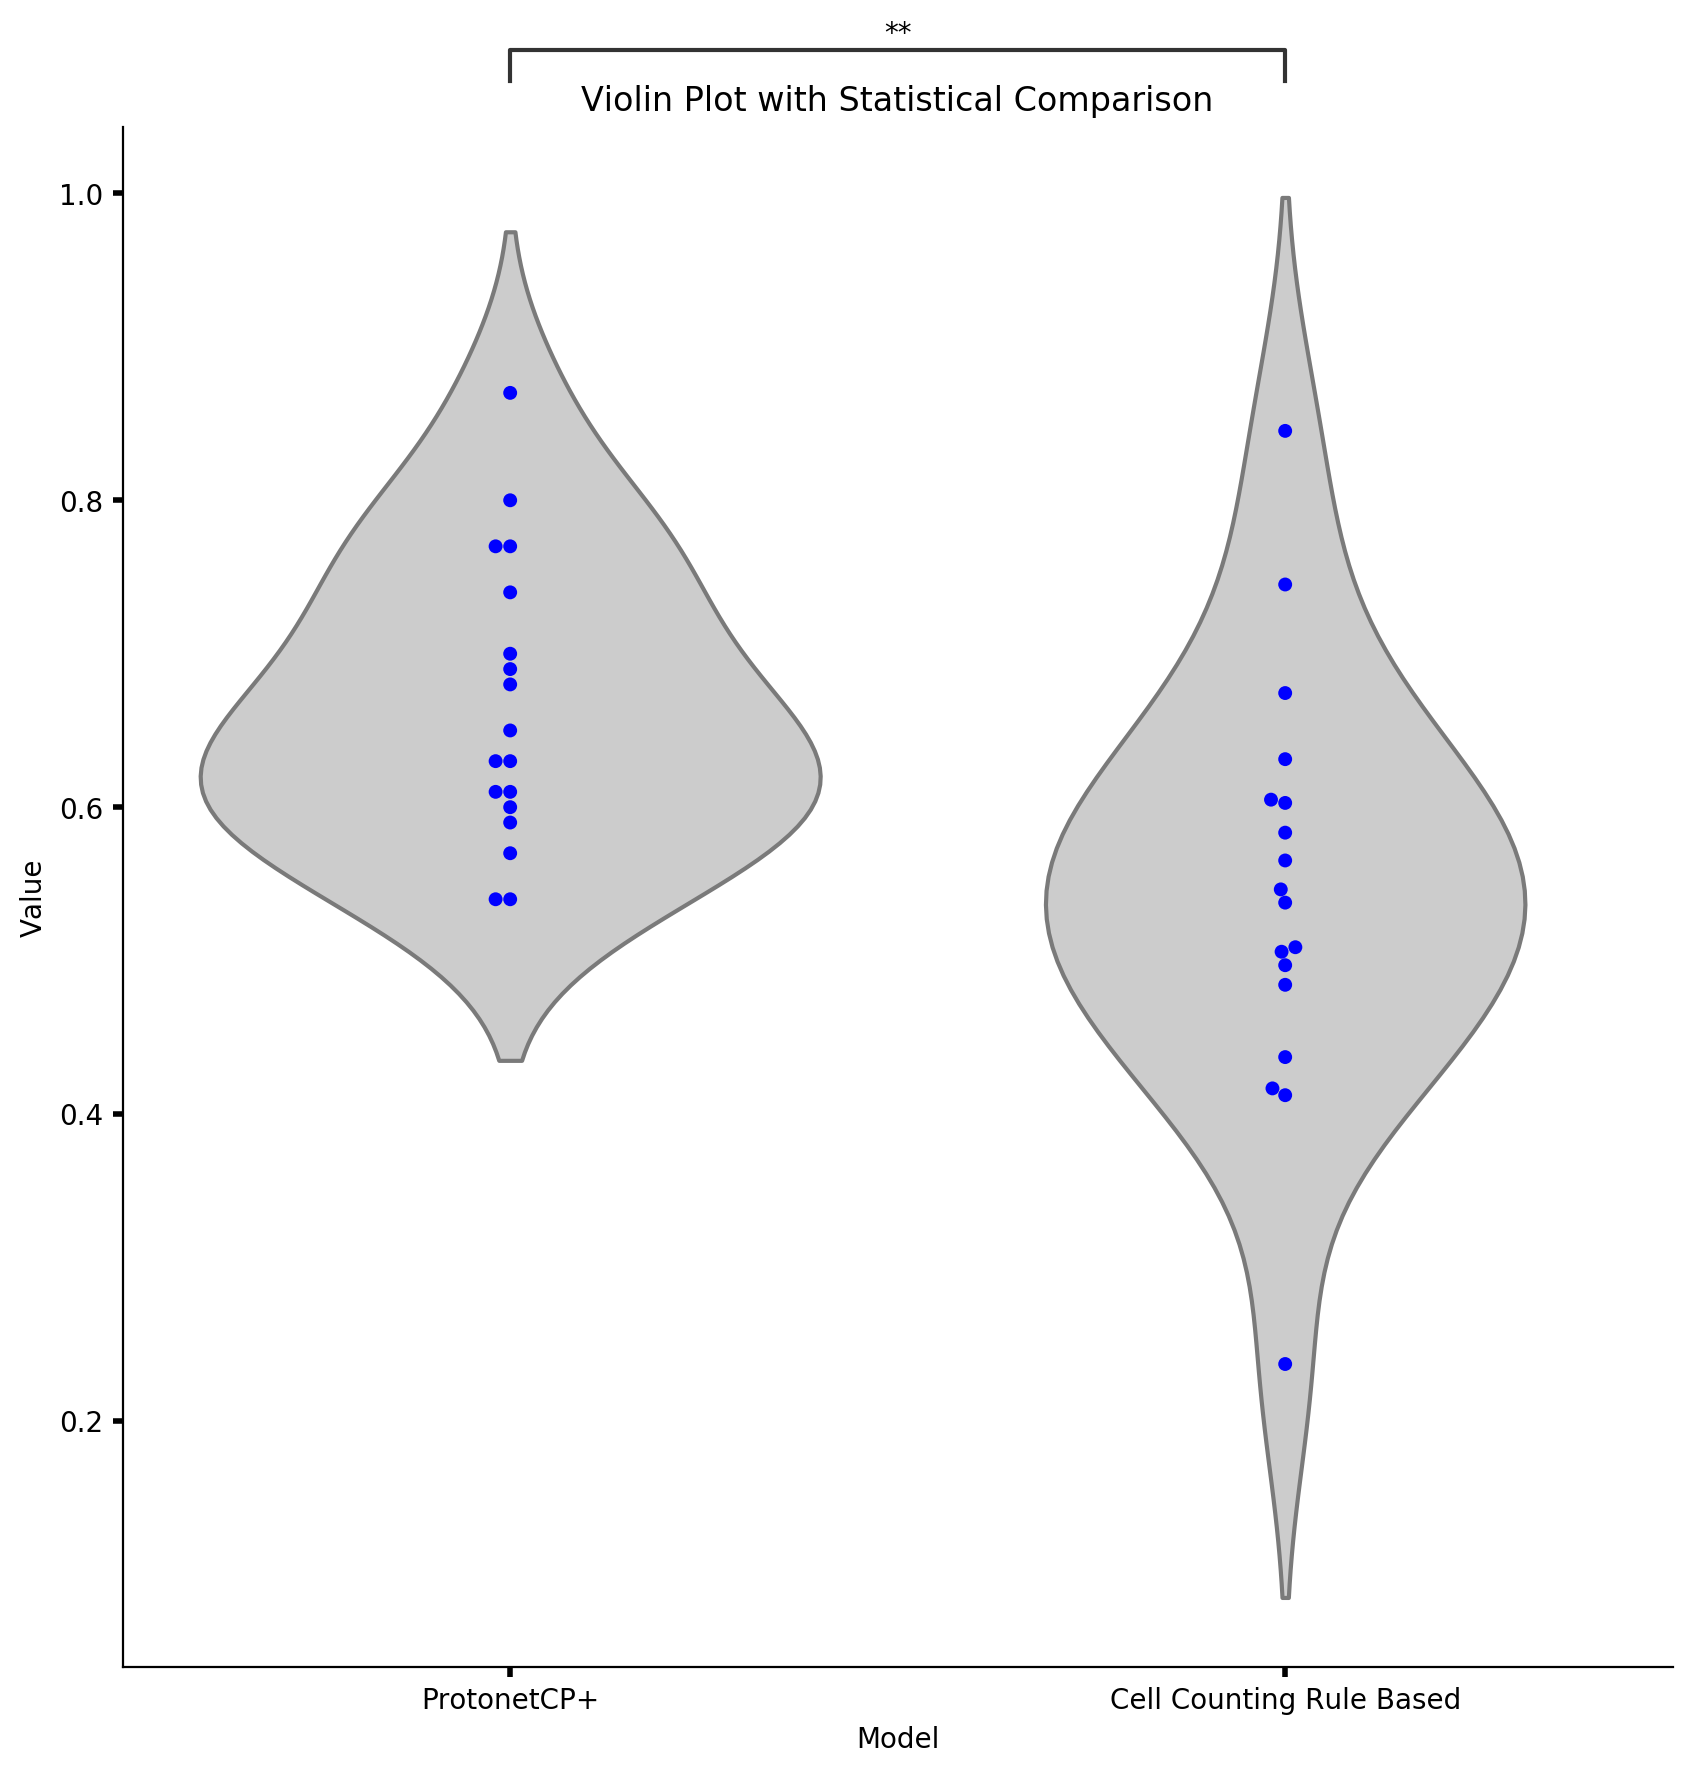

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import pandas as pd
from scipy.stats import ttest_rel


# Create the figure
plt.figure(figsize=(10, 10), dpi=200)

# Create the violin plot
sns.violinplot(x='Model', y='Value', data=df_melt, inner=None, color=".8")
sns.swarmplot(x='Model', y='Value', data=df_melt, color='blue', edgecolor='k')

# Perform paired t-test
t_stat, p_val = ttest_rel(df['AUC'], df['64'])

# Add statistical annotation
add_stat_annotation(
    plt.gca(),
    data=df_melt,
    x='Model',
    y='Value',
    box_pairs=[('ProtonetCP+', 'Cell Counting Rule Based')],
    test='t-test_paired',
    text_format='star',
    loc='outside',
    verbose=2
)

# Customizing the axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)



plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_tick_params(width=2)
plt.gca().xaxis.set_tick_params(width=2)

# Adding titles and labels
plt.title('Violin Plot with Statistical Comparison')
plt.xlabel('Model')
plt.ylabel('Value')

# Displaying the plot
plt.show()
